In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import numpy as np

from ta_funcs import *
from helpers import *

import pickle as pkl

sns.set_theme(style="darkgrid")

%load_ext autoreload
%autoreload 2

df = yf.download("SBIN.NS", start="2022-01-01", end="2023-04-30", interval="1h")
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-01-03 09:15:00+05:30,462.100006,465.000000,460.100006,465.000000,465.000000,0
2022-01-03 10:15:00+05:30,465.000000,467.200012,464.149994,467.100006,467.100006,2389531
2022-01-03 11:15:00+05:30,467.000000,467.100006,465.299988,466.299988,466.299988,960631
2022-01-03 12:15:00+05:30,466.399994,467.899994,466.299988,467.500000,467.500000,1386992
2022-01-03 13:15:00+05:30,467.600006,470.250000,467.200012,469.899994,469.899994,1889395
...,...,...,...,...,...,...
2023-04-28 11:15:00+05:30,569.000000,570.799988,568.250000,570.650024,570.650024,1601053
2023-04-28 12:15:00+05:30,570.849976,571.500000,569.900024,570.799988,570.799988,1363413
2023-04-28 13:15:00+05:30,570.799988,571.650024,570.000000,571.500000,571.500000,1455204


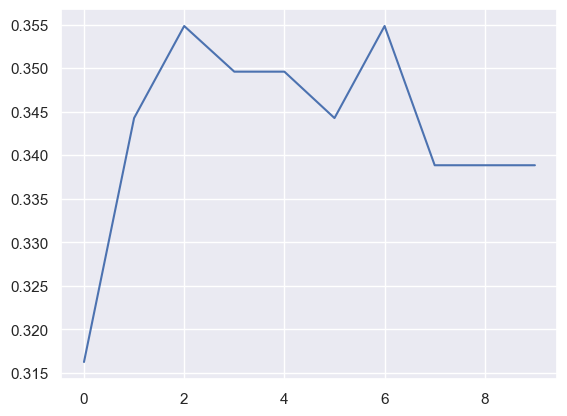

In [28]:
# plot accuracy for different window sizes
accuracy = []
for i in range(1, 11):
    accuracy.append(check(df, i, False, bullish_engulfing))

plt.plot(accuracy)

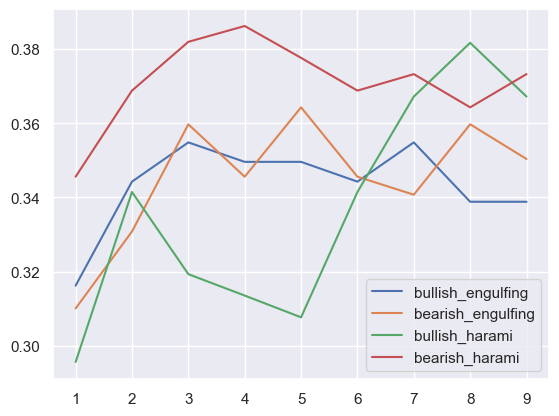

In [29]:
# plot accuracy for different window sizes
for func in [bullish_engulfing, bearish_engulfing, bullish_harami, bearish_harami]:
    accuracy = []
    for i in range(1, 10):
        accuracy.append(check(df, i, False, func))

    # make x axis start from 1
    plt.plot(range(1, 10), accuracy, label=func.__name__)
    
plt.legend()

In [3]:
stocks = pd.read_csv('ind_nifty100list.csv')
stocks['Symbol'] = stocks['Symbol'] + '.NS'
stocks

,Company Name,Industry,Symbol,Series,ISIN Code
0,ABB India Ltd.,Capital Goods,ABB.NS,EQ,INE117A01022
1,ACC Ltd.,Construction Materials,ACC.NS,EQ,INE012A01025
2,Adani Enterprises Ltd.,Metals & Mining,ADANIENT.NS,EQ,INE423A01024
3,Adani Green Energy Ltd.,Power,ADANIGREEN.NS,EQ,INE364U01010
4,Adani Ports and Special Economic Zone Ltd.,Services,ADANIPORTS.NS,EQ,INE742F01042
...,...,...,...,...,...
95,United Spirits Ltd.,Fast Moving Consumer Goods,MCDOWELL-N.NS,EQ,INE854D01024
96,Varun Beverages Ltd.,Fast Moving Consumer Goods,VBL.NS,EQ,INE200M01013
97,Vedanta Ltd.,Metals & Mining,VEDL.NS,EQ,INE205A01025
98,Wipro Ltd.,Information Technology,WIPRO.NS,EQ,INE075A01022


In [37]:
stock_data = get_data(stocks['Symbol'])

Data loaded from file


In [38]:
# len(stock_data)

100

In [40]:
data = get_accuracies(stock_data)

Function: bullish_engulfing


100%|██████████| 100/100 [00:29<00:00,  3.34it/s]


Function: bearish_engulfing


100%|██████████| 100/100 [00:31<00:00,  3.14it/s]


Function: bullish_harami


100%|██████████| 100/100 [00:31<00:00,  3.20it/s]


Function: bearish_harami


100%|██████████| 100/100 [00:29<00:00,  3.40it/s]


Text(0.5, 1.0, 'Accuracy vs window size for different indicators')

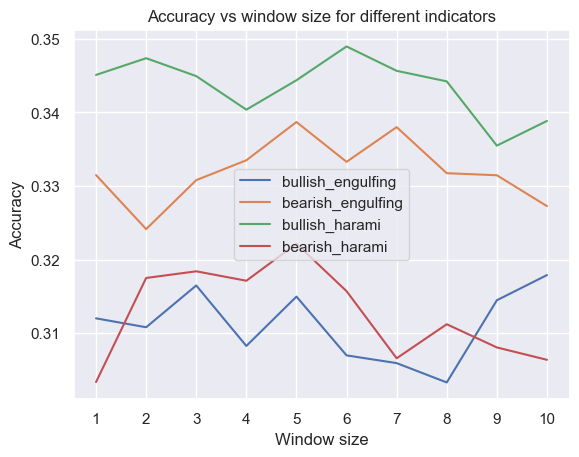

In [45]:
# plot accuracy for different window sizes, average over all stocks
for func in [bullish_engulfing, bearish_engulfing, bullish_harami, bearish_harami]:
    accuracy = []
    for i in range(1, 11):
        accuracy.append(np.mean([data[func.__name__][stock][i-1] for stock in stocks['Symbol']]))

    # make x axis start from 1
    plt.plot(range(1, 11), accuracy, label=func.__name__)

plt.legend()
# plot all x axis from 1
plt.xticks(range(1, 11))
plt.xlabel("Window size")
plt.ylabel("Accuracy")
plt.title("Accuracy vs window size for different indicators averaged over all stocks")

In [5]:
stock_data = get_data(stocks['Symbol'], interval="1h")

100it [01:34,  1.05it/s]


In [6]:
data = get_accuracies(stock_data)

Function: bullish_engulfing


100%|██████████| 100/100 [05:18<00:00,  3.19s/it]


Function: bearish_engulfing


100%|██████████| 100/100 [05:22<00:00,  3.22s/it]


Function: bullish_harami


100%|██████████| 100/100 [05:23<00:00,  3.24s/it]


Function: bearish_harami


100%|██████████| 100/100 [05:25<00:00,  3.25s/it]


Text(0.5, 1.0, 'Accuracy vs window size for different indicators averaged over all stocks')

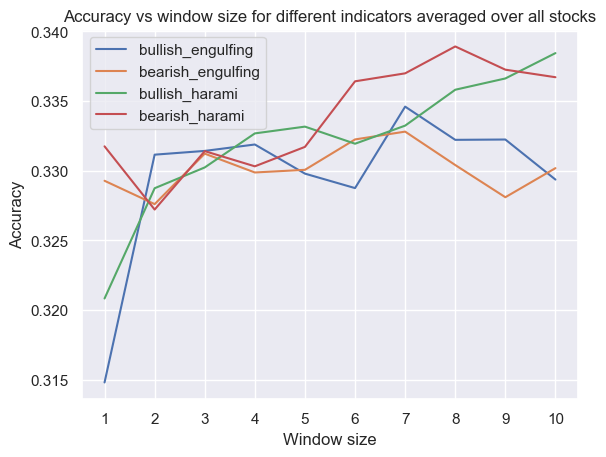

In [7]:
# plot accuracy for different window sizes, average over all stocks
for func in [bullish_engulfing, bearish_engulfing, bullish_harami, bearish_harami]:
    accuracy = []
    for i in range(1, 11):
        accuracy.append(np.mean([data[func.__name__][stock][i-1] for stock in stocks['Symbol']]))

    # make x axis start from 1
    plt.plot(range(1, 11), accuracy, label=func.__name__)

plt.legend()
# plot all x axis from 1
plt.xticks(range(1, 11))
plt.xlabel("Window size")
plt.ylabel("Accuracy")
plt.title("Accuracy vs window size for different indicators averaged over all stocks")

In [11]:
stock_data

{'ABB.NS':                                   Open         High          Low        Close  \
 Datetime                                                                        
 2022-01-03 09:15:00+05:30  2251.449951  2268.500000  2225.050049  2225.550049   
 2022-01-03 10:15:00+05:30  2225.550049  2235.750000  2222.000000  2230.149902   
 2022-01-03 11:15:00+05:30  2228.750000  2228.750000  2215.500000  2219.649902   
 2022-01-03 12:15:00+05:30  2219.649902  2222.800049  2205.000000  2206.699951   
 2022-01-03 13:15:00+05:30  2206.699951  2210.899902  2200.500000  2207.000000   
 ...                                ...          ...          ...          ...   
 2023-04-28 11:15:00+05:30  3399.399902  3417.750000  3397.649902  3401.750000   
 2023-04-28 12:15:00+05:30  3401.800049  3404.100098  3396.199951  3403.000000   
 2023-04-28 13:15:00+05:30  3402.800049  3422.000000  3401.699951  3419.899902   
 2023-04-28 14:15:00+05:30  3418.100098  3422.750000  3398.850098  3422.550049   
 2023-

In [8]:
def rand_select(df):
    return np.random.random() < 0.02

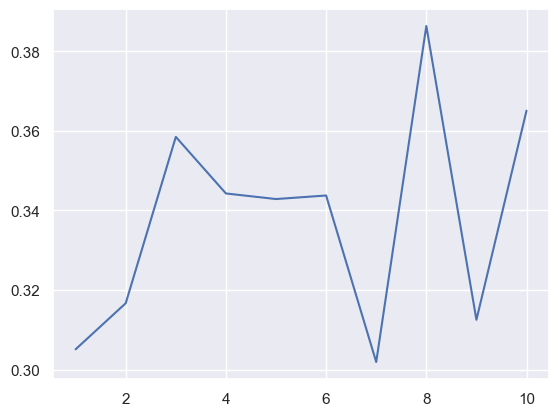

In [10]:
accuracies = []
for window in range(1, 11):
    accuracy = check(df, window, False, rand_select)
    accuracies.append(accuracy)

plt.plot(range(1, 11), accuracies)

In [13]:
# average over all stocks

rand_data = {}

for stock in stock_data:
    curr_accs = []
    df = stock_data[stock]
    for window in range(1, 11):
        accuracy = check(df, window, False, rand_select)
        curr_accs.append(accuracy)

    rand_data[stock] = curr_accs

    print(stock, curr_accs)

ABB.NS [0.3424657534246575, 0.29850746268656714, 0.32786885245901637, 0.328125, 0.32653061224489793, 0.3375, 0.37142857142857144, 0.3888888888888889, 0.4067796610169492, 0.3235294117647059]
ACC.NS [0.3114754098360656, 0.32894736842105265, 0.34328358208955223, 0.3225806451612903, 0.359375, 0.32786885245901637, 0.328125, 0.2714285714285714, 0.36923076923076925, 0.34210526315789475]
ADANIENT.NS [0.379746835443038, 0.352112676056338, 0.38571428571428573, 0.3384615384615385, 0.36507936507936506, 0.4025974025974026, 0.35064935064935066, 0.3333333333333333, 0.36904761904761907, 0.37209302325581395]
ADANIGREEN.NS [0.3283582089552239, 0.3157894736842105, 0.2692307692307692, 0.28846153846153844, 0.26666666666666666, 0.29508196721311475, 0.3880597014925373, 0.3384615384615385, 0.3448275862068966, 0.3384615384615385]
ADANIPORTS.NS [0.34285714285714286, 0.34146341463414637, 0.3076923076923077, 0.33783783783783783, 0.3434343434343434, 0.3291139240506329, 0.3275862068965517, 0.3625, 0.296296296296296

Text(0.5, 1.0, 'Accuracy vs window size for different indicators averaged over all stocks for random selection')

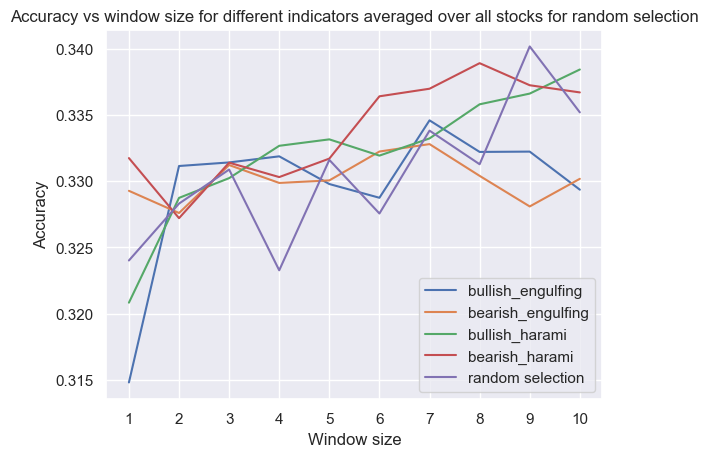

In [17]:
# plot accuracy for different window sizes, average over all stocks
for func in [bullish_engulfing, bearish_engulfing, bullish_harami, bearish_harami]:
    accuracy = []
    for i in range(1, 11):
        accuracy.append(np.mean([data[func.__name__][stock][i-1] for stock in stocks['Symbol']]))

    # make x axis start from 1
    plt.plot(range(1, 11), accuracy, label=func.__name__)


accuracy = []
for i in range(1, 11):
    accuracy.append(np.mean([rand_data[stock][i-1] for stock in stocks['Symbol']]))

# make x axis start from 1
plt.plot(range(1, 11), accuracy, label='random selection')

plt.legend()
plt.xticks(range(1, 11))
plt.xlabel("Window size")
plt.ylabel("Accuracy")
plt.title("Accuracy vs window size for different indicators averaged over all stocks for random selection")
